# Reto Aprendizaje Automático

### Descripción:
Los datos están relacionados con campañas de marketing de una institución bancaria portuguesa. Las campañas de marketing se basan en llamadas telefónicas. Normalmente, hizo falta más de una llamada al mismo cliente para  saber si finalmente se suscribirían al producto (depósito bancario) o no.
El objetivo de la clasificación es predecir si el cliente se suscribirá (sí/no) a un depósito (variable y).



### Librerías Importadas:
Importamos algunas librerías para ayudarnos a realizar nuestros modelos (Decision Tree, Support Vector Machine, Random Forest):

In [ ]:
# Usamos la librería de "pandas" para cargar y manipulasr los datos para One-Hot encoding
import pandas as pd

# Usamos la librería de "numpy" para calcular la media y la desviación estandar
import numpy as np

# Usamos la librería de "pyplot" para dibujar gráficas
import matplotlib.pyplot as plt

# Usamos la librería "DecisionTreeClassifier" para construir un arbol de clasificación
from sklearn.tree import DecisionTreeClassifier

# Usamos la librería de "RandomForestClassifier" para construir un random forest
from sklearn.ensemble import RandomForestClassifier

# Usamos la librería de "SVC" para construir un soporte de máquina de vectores, en particular una clasificación de vectores de soporte C
from sklearn.svm import SVC

# Usamos la librería de "plot_tree" para dibujar un arbol de clasificación
from sklearn.tree import plot_tree

# Usamos la librería de "train_split_test" para separar los datos en training y testing sets
from sklearn.model_selection import train_test_split

# Usamos la librería "cross_val_score" para realizar cross validation
from sklearn.model_selection import cross_val_score

# Usamos la librería de "GridSearchCV" para realizar cross validation relacionado con SVC
from sklearn.model_selection import GridSearchCV

# Usamos la librería "confusion_matrix" para crear una matriz de confusión
from sklearn.metrics import confusion_matrix

# Usamos la librería "ConfusionMatrixDisplay" para imprimir la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

# Usamos la librería "f1_score" para evaluar los modelos
from sklearn.metrics import f1_score

# Usamos la librería "scale" para escalar los datos
from sklearn.preprocessing import scale

#Usamos la librería "resample" para reducir las filas y ahorrar en coste computacional
from sklearn.utils import resample

### Inicializamos el Dataframe:

Importamos el df training usando pandas para leer el csv. En particular, usamos solamente el dataset "train.csv" para construir los modelos

In [ ]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test_nolabel.csv')
# Imprimimos las 5 primeras filas de nuestro training df
df.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Expected
0,44dc8df9,35,admin.,married,high.school,unknown,no,no,telephone,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
1,3f62aa06,52,technician,married,basic.9y,no,no,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
2,34bd6148,44,blue-collar,single,basic.9y,no,no,no,cellular,may,...,4,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,0
3,e1671cba,35,admin.,married,high.school,no,yes,yes,telephone,jun,...,9,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,c20477f0,33,technician,married,university.degree,no,yes,no,cellular,jul,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0


### Identificar los datos que faltan:

In [ ]:
#Primero, miramos el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              36188 non-null  object 
 1   age             36188 non-null  int64  
 2   job             36188 non-null  object 
 3   marital         36188 non-null  object 
 4   education       36188 non-null  object 
 5   default         36188 non-null  object 
 6   housing         36188 non-null  object 
 7   loan            36188 non-null  object 
 8   contact         36188 non-null  object 
 9   month           36188 non-null  object 
 10  day_of_week     36188 non-null  object 
 11  duration        36188 non-null  int64  
 12  campaign        36188 non-null  int64  
 13  pdays           36188 non-null  int64  
 14  previous        36188 non-null  int64  
 15  poutcome        36188 non-null  object 
 16  emp.var.rate    36188 non-null  float64
 17  cons.price.idx  36188 non-null 

Ahora consideramos cuántos valores "unknown" hay en cada columna relacionada con datos categóricos en nuestro conjunto de datos, para comprender cuáles son las columnas con muchos valores desconocidos. De esta forma, podemos dropearlos, con el fin de optimizar el entrenamiento de nuestro modelo.

In [ ]:
print('Job unknown value: ', len(df[df['job'].str.contains("unknown")]))
print('Marital unknown value: ',len(df[df['marital'].str.contains("unknown")]))
print('Education unknown value: ',len(df[df['education'].str.contains("unknown")]))
print('Default unknown value: ',len(df[df['default'].str.contains("unknown")]))
print('Housing unknown value: ',len(df[df['housing'].str.contains("unknown")]))
print('Loan v value: ',len(df[df['loan'].str.contains("unknown")]))
print('\nDecidimos borrar, default, housing and loan features porque contienen muchos valores unknown')

Job unknown value:  283
Marital unknown value:  69
Education unknown value:  1515
Default unknown value:  7573
Housing unknown value:  876
Loan v value:  876

Decidimos borrar, default, housing and loan features porque contienen muchos valores unknown


In [ ]:
print('Job unknown value: ', len(df_test[df_test['job'].str.contains("unknown")]))
print('Marital unknown value: ',len(df_test[df_test['marital'].str.contains("unknown")]))
print('Education unknown value: ',len(df_test[df_test['education'].str.contains("unknown")]))
print('Default unknown value: ',len(df_test[df_test['default'].str.contains("unknown")]))
print('Housing unknown value: ',len(df_test[df_test['housing'].str.contains("unknown")]))
print('Loan unknownnull value: ',len(df_test[df_test['loan'].str.contains("unknown")]))

Job unknown value:  47
Marital unknown value:  11
Education unknown value:  216
Default unknown value:  1024
Housing unknown value:  114
Loan unknownnull value:  114


Aquí comprobamos cuáles son las columnas (con valores continuos) con una varianza alta y una varianza baja, así que seleccionamos solo la función con una variación alta porque contribuyen a construir mejores modelos.

In [ ]:
print('Variance train dataset:\n', df.var().to_string())
print('Variance test dataset:\n', df_test.var().to_string())

Variance train dataset:
 age                 109.085822
duration          67028.298765
campaign              7.863276
pdays             35058.671870
previous              0.244701
emp.var.rate          2.461354
cons.price.idx        0.334666
cons.conf.idx        21.327789
euribor3m             3.005678
nr.employed        5222.431508
Expected              0.099672
Variance test dataset:
 age                 105.117977
duration          68666.381311
campaign              6.288017
pdays             34051.335037
previous              0.246608
emp.var.rate          2.515890
cons.price.idx        0.337925
cons.conf.idx        22.091564
euribor3m             3.027939
nr.employed        5205.752838


/var/folders/tg/vdglpn4d7h5cqcl0ymkbg86r0000gn/T/ipykernel_6357/85900182.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Variance train dataset:\n', df.var().to_string())
/var/folders/tg/vdglpn4d7h5cqcl0ymkbg86r0000gn/T/ipykernel_6357/85900182.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Variance test dataset:\n', df_test.var().to_string())


Aquí comprobamos la correlación de personas entre nuestras características continuas y nos centraremos en las que tienen un coeficiente cercano a 1, que es el valor máximo de la correlación.

In [ ]:
print('Pearson correlation train dataset:\n',df.corr(method ='pearson'))
print('\nThere is no additional hint regards removing some columns doing the Pearson correlation, because the previous methods of feature selection are sufficient to make the optimal choices for us')
print('\n######################\n')
print('Pearson correlation test dataset:\n',df_test.corr(method ='pearson'))

Pearson correlation train dataset:
                      age  duration  campaign     pdays  previous  \
age             1.000000  0.001044  0.003614 -0.035626  0.027634   
duration        0.001044  1.000000 -0.073238 -0.047449  0.021358   
campaign        0.003614 -0.073238  1.000000  0.052207 -0.078471   
pdays          -0.035626 -0.047449  0.052207  1.000000 -0.588294   
previous        0.027634  0.021358 -0.078471 -0.588294  1.000000   
emp.var.rate   -0.001141 -0.030259  0.151083  0.269607 -0.421038   
cons.price.idx  0.002466  0.004870  0.128346  0.074023 -0.202622   
cons.conf.idx   0.127105 -0.009050 -0.012642 -0.085307 -0.055675   
euribor3m       0.009046 -0.036041  0.135468  0.296821 -0.455166   
nr.employed    -0.020291 -0.047976  0.143716  0.372818 -0.500717   
Expected        0.032381  0.406360 -0.067544 -0.324051  0.233950   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.001141        0.002466       0.127105   0.009046   

### Formatear los Datos:
Procedemos a separar nuestro dataframe en variables Dependendientes (X) y variables Independientes (Y) para construir los modelos:

In [ ]:
X = df.drop(['Id',
             'Expected',
             'education',
             'default',
             'housing',
             'loan',
             'campaign',
             'previous',
             'emp.var.rate',
             'cons.price.idx',
             'cons.conf.idx',
             'euribor3m'], axis=1).copy()

X = X.drop(df.index[range(26000)])

In [ ]:
# Creamos una nueva copia de la columna de datos que queremos predecir:
y = df['Expected'].copy()
y = y.drop(df.index[range(26000)])

Nos damos cuenta de que algunos de los datos son float/int "continous data" y que otros son objetos. Tras esto, formateamos nuestros datos de X usando One-Hot Encoding, para transformar los datos caategóricos en datos contínuos y proceder a crear nuestros modelos.

In [ ]:
# Convertimos una columna de datos categóricos en múltiples columnas con valores binarios
X_encoded = pd.get_dummies(X, columns=['job',
                                        'marital',
                                        'contact',
                                        'month',
                                        'day_of_week',
                                        'poutcome'])

Tras la realización de todos los pasos anteriores, nos encontramos con dos dataset con los formatos requeridos para empezar a construir los modelos, por lo que separamos nuestros datos en los sets de training y testing

In [ ]:
# Separamos los datos en los sets training y testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Primer Algoritmo: Decision Tree

### Construcción de un Primer Árbol de Clasificación

In [ ]:
# Creamos un árbol de decision y lo entrenamos con los datos de training
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

# Calculamos los valores predichos de y poninedo los valores de X_test como input
y_pred = clf_dt.predict(X_test)


# Ahora imprimimos el árbol
#plt.figure(figsize=(15, 7.5))
#plot_tree(clf_dt,
          #filled=True,
          #rounded=True,
          #class_names=["No Expected", "Yes Expected"],
          #feature_names=X_encoded.columns);

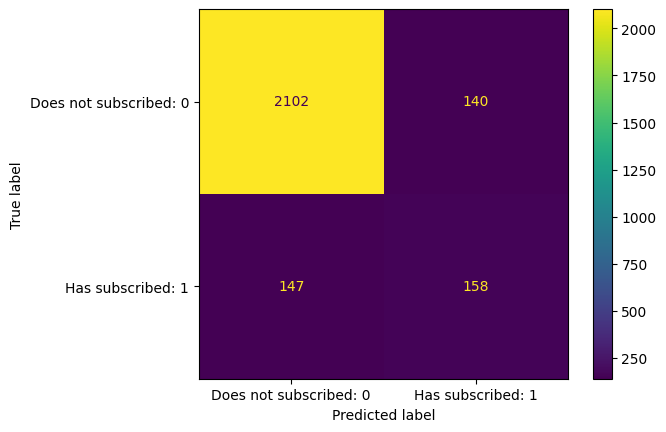

In [ ]:
# Imprimimos la matriz de confusión para poder observar que tan bien funciona nuestro modelo en el dataset de testing:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Does not subscribed: 0", "Has subscribed: 1"])

La matriz de confusión nos dice que hay 2102 + 140 = 2242 personas que no se han suscrito, 2102 personas (un 94%) fueron correctamente clasificadas. Por otra parte, 147 + 158 = 305 personas se llegaron a suscribir, 158 personas (un 52%) fueron correctamente clasificadas.

In [ ]:
# Procedemos a calcular la métrica "Macro F1-Score" para evaluar este primer modelo:
f1_score(y_test, y_pred, average='macro')

0.7300704227692532

Podríamos haber sobreajustado el conjunto de datos de entrenamiento, por lo que podemos prunar el árbol para resolver el problema de sobreajustado y obtener mejores resultados.

### Costo de complejidad de la Poda

Normalmente, los árboles de decisión sufren un sobreajuste relacionado con el conjunto de datos de entrenamiento: por lo tanto, podar un árbol es útil para encontrar un árbol más pequeño que mejore la precisión con el conjunto de datos de prueba.

Sólo tenemos que encontrar el valor correcto para "alpha" (que es el parámetro de poda), que controla la cantidad de poda que se produce. Para hacer esto, trazamos la "precisión" del árbol en función de diferentes valores, y lo haremos tanto para el conjunto de datos de entrenamiento como para el de prueba.

In [ ]:
# Determinamos los valores de alpha para este árbol
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)

# Extraemos diferentes valores para alpha
ccp_alphas = path.ccp_alphas

# No consideramos el máximo valor de alpha, ya que acabaríamos podando todas las ramas
ccp_alphas = ccp_alphas[:-1]

# Crearemos un array para insertar los árboles de decisión
clf_dts = []

# Ahora creamos un árbol de decisión para los valores de alpha y los almacenamos en la matriz creada previamente
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

We use cross_val_score() function to generate different training and testing datasets and then train and test the tree with those datasets. So, we create initially a tree with a random ccp_alpha in order to see how the f1_score variates between different selection of train datasets:

<AxesSubplot: xlabel='tree'>

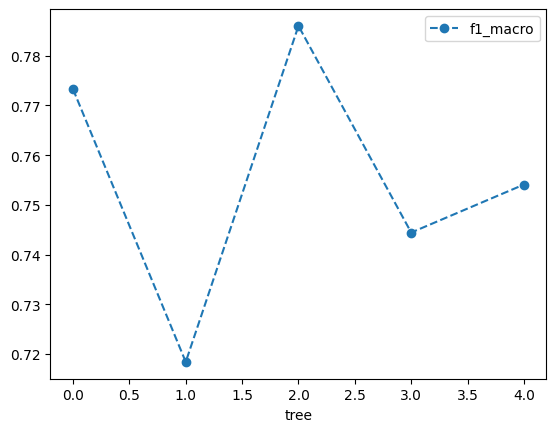

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0005)

# Now we use 5-fold cross validation creating 5 different training and testing datasets that used to train and test the tree
scores = cross_val_score(clf_dt, X_train, y_train, cv=5, scoring='f1_macro')
df = pd.DataFrame(data={'tree': range(5), 'f1_macro': scores})
df.plot(x='tree', y='f1_macro', marker='o', linestyle='--')

Looking at the graph above, we notice that using different Training and Testing datasets with the same alpha we obtain different accuracies results, suggesting us that alpha is sensitive to the datasets that we consider. For this reason, instead of considering single Training dataset and single Testing dataset, we use cross validation to find the optimal value
for ccp_alpha.

<AxesSubplot: xlabel='alpha'>

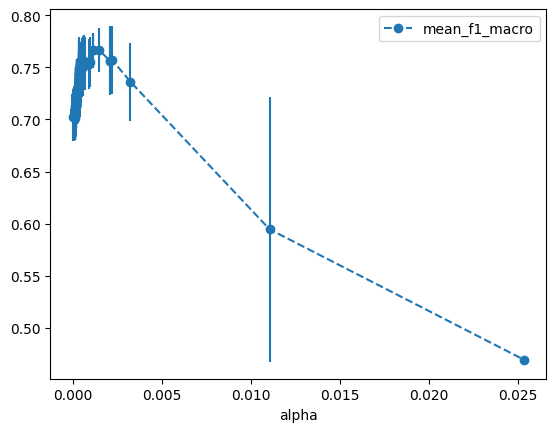

In [ ]:
# We create an array to store the results of each fold during cross validation
alpha_loop_values = []

# We run 5-fold cross validation for each candidate value for alpha:
# We store the mean and standard deviation of the scores (the accuracy) for each call
    # to cross_val_score in alpha_loop_values
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10, scoring='f1_macro')
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Now we draw a graph of the "means" and "standard deviations" of the scores for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns= ['alpha', 'mean_f1_macro', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_f1_macro',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [ ]:
# Usamos cross validation y notamos que en lugar de configurar cp_alpha aleatorio,
# necesitamos configurarlo con el valor con la mejor precisión en este rango

# Ahora almacenamos el valor ideal para alpha y lo usamos para construir el mejor árbol:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.001400)
                                &
                                (alpha_results['alpha'] < 0.001470)]['alpha']
ideal_ccp_alpha

255    0.00146
Name: alpha, dtype: float64

In [ ]:
# Ahora convertimos ideal_ccp_alpha a tipo "float"
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.0014600005441197904

Este es nuestro valor ideal para "alpha", por lo que ahora podemos construir nuestro árbol de clasificación final.

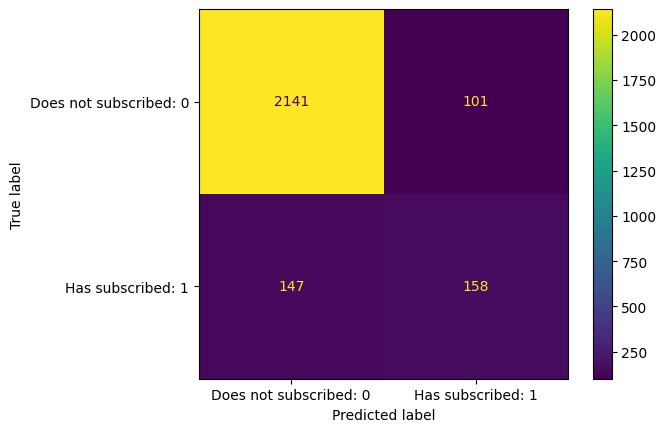

In [ ]:
# Ahora construimos y entrenamos un nuevo árbol de decisión usando el valor óptimo encontrado para "alpha"
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

# Calculamos los valores predichos de y poniendo X_test como input
y_pred_pruned = clf_dt_pruned.predict(X_test)

# Imprimimos otra matriz de confusión para ver si el árbol podado es mejor que el árbol inicial.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pruned, display_labels=["Does not subscribed: 0", "Has subscribed: 1"])

De las 2141 + 101 = 2242 personas que no se suscribieron, 2141 personas (alrededor del 95%) fueron correctamente clasificadas. Esta es una mejora con respecto al árbol de tamaño completo, que solamente clasificó correctamente a 2102 personas (alrededor del 94%). De los 144 + 158 = 302 clientes que se suscribieron, 158 personas (alrededor del 52%) fueron clasificados correctamente.
En este caso no tenemos ninguna mejora con respecto al árbol de tamaño completo.

Procedemos a dibujar el árbol podado:

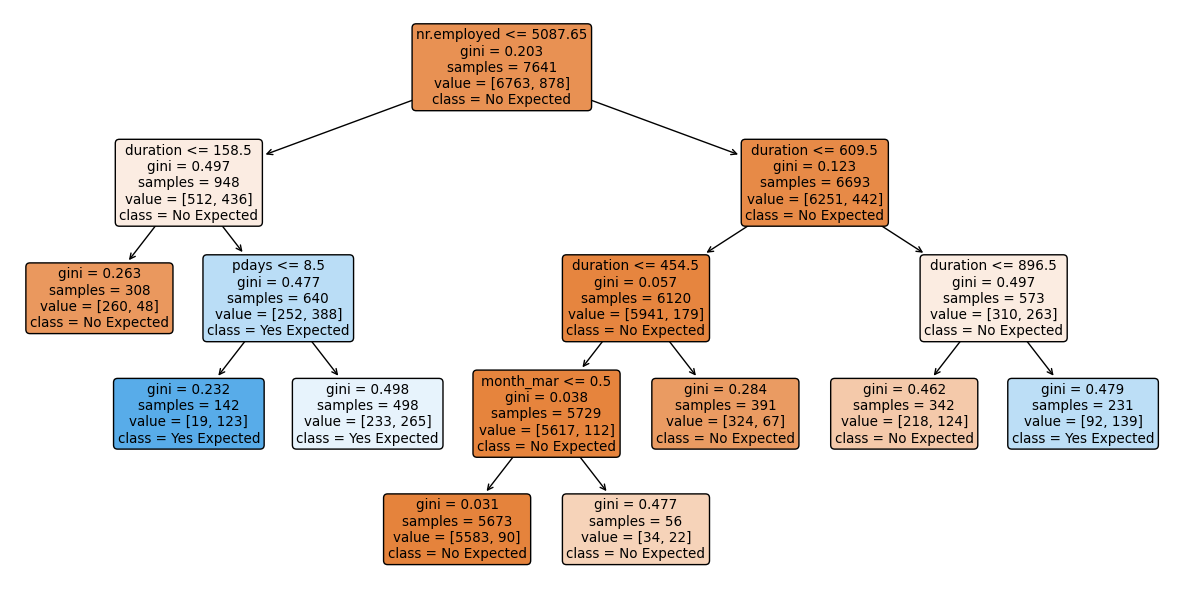

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names= ["No Expected", "Yes Expected"],
          feature_names=X_encoded. columns);

In [ ]:
# Ahora calculamos la métrica "Macro F1-Score" para evaluar este modelo final:
f1_score(y_test, y_pred_pruned, average='macro')

0.75276877553896

Observando el resultado, nos damos cuenta de que después de elegir otro valor de "alpha" para nuestro árbol de decisión mediante cross validation, hemos creado un árbol de decisión que tiene una macro f1_score mejor que la anterior.

# Segundo Algoritmo: Support Vector Machine
### Centrado y escalado:
Usaremos en nuestro modelo la Radial Basis Function (RBF) con nuestra Support Vector Machine, y asume que los datos están centrados. Por lo que escalamos los datos, o en otras palabras, cada columna de nuestros datos tendrá un valor medio = 0 y una desviación estándar = 1. Lo aplicamos a los conjuntos de prueba y entreno.

In [ ]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Construcción de nuestra Support Vector Machine:
Creamos nuestra Support Vector Machine, en particular una clasificación de vectores de soporte C, y luego la ajustamos a los datos de entrenamiento escalados.

F1-macro preliminary model:  0.7048314379920598


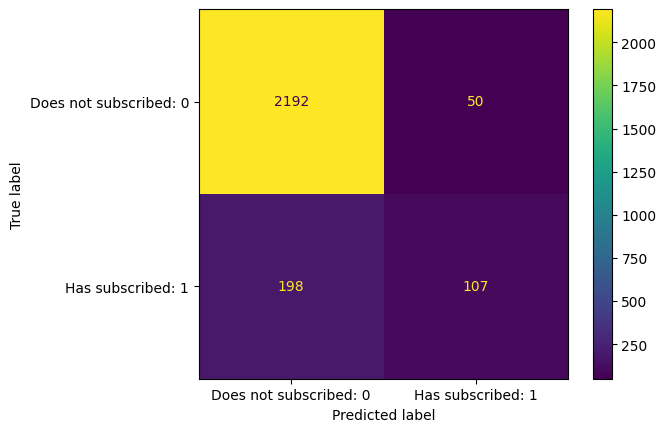

In [ ]:
svc_model = SVC(random_state=42)
svc_model = svc_model.fit(X_train_scaled, y_train)

# Calculamos los valores predichos de y poniendo como input el X_test escalado
y_pred_scaled = svc_model.predict(X_test_scaled)

# Ahora trazamos una matriz de confusión para ver cómo funciona nuestro modelo en el conjunto de datos de prueba:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_scaled, display_labels=["Does not subscribed: 0", "Has subscribed: 1"])

# Calculamos también la métrica "Macro F1-Score" para evaluar este modelo preliminar:
print('F1-macro preliminary model: ', f1_score(y_test, y_pred_scaled, average='macro'))

La matriz de confusión nos dice que de las 2192 + 50 = 2242 personas que no se habían suscrito, 2192 personas fueron correctamente clasificadas. Y de las 198 +107 = 306 personas que se han suscrito, 107 personas fueron correctamente clasificadas. Intentemos mejorar las predicciones usando Cross Validation para optimizar los parámetros.

### Optimización de parámetros con Cross Validation y GridSearchCV:

Ahora tratamos de optimizar la Support Vector Machine encontrando el mejor valor para "gamma" y, potencialmente, el parámetro de regularización, C. De esta manera, tratamos de mejorar la precisión con el conjunto de datos de prueba.
Dado que tenemos dos parámetros para optimizar, usaremos GridSearchCV(), por lo que especificamos unos cuantos valores potenciales para gamma y C, y la función GridSearchCV() prueba todas las combinaciones posibles de los parámetros

In [ ]:
#param_grid = [
#    {'C':[0.5, 10, 100],
#    'gamma':['scale', 0.1, 0.01, 0.001],
#    'kernel':['rbf', 'linear', 'poly']}
#]

#opt_params = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro')
#opt_params.fit(X_train_scaled, y_train)
#print('Best parameters are:', opt_params.best_params_)


Nos damos cuenta de que el valor ideal para C es 10, lo que significa que usaremos regularización, y el valor ideal para gamma es 0.01

F1-macro final model:  0.7263352528323218


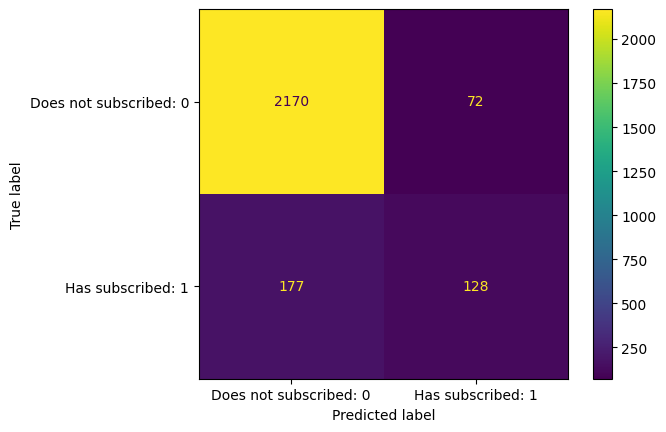

In [ ]:
# Ahora construimos y volvemos a entrenar el modelo usando estos parámetros:
svc_model = SVC(random_state=42, C=10, gamma=0.01, kernel='rbf')
svc_model.fit(X_train_scaled, y_train)

# Calculamos los valores predichos de y poniendo en entrada el X_test escalado
y_pred_scaled = svc_model.predict(X_test_scaled)

# Ahora imprimimos una matriz de confusión para ver cómo funciona nuestro modelo final en el conjunto de datos de prueba:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_scaled, display_labels=["Does not subscribed: 0", "Has subscribed: 1"])

# Calculamos también la métrica "Macro F1-Score" para evaluar este modelo preliminar:
print('F1-macro final model: ', f1_score(y_test, y_pred_scaled, average='macro'))

La matriz de confusión nos dice que de las 2170 + 72 = 2240 personas que no tenían se han suscrito, 2170 personas fueron correctamente clasificados. De las 177 + 128 = 305 personas que se han suscrito, 128 personas fueron correctamente clasificadas. Así que el modelo final es incluso peor que el preliminar, pero la puntuación de f1-macro resulta ser mejor.

# Tercer Algoritmo: Random Forest (Algoritmo Secreto)
### Construir un Random Forest:
Creamos un random forest y luego lo ajustamos a los datos de entrenamiento.

In [ ]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('F1-macro model: ', f1_score(y_test, y_pred, average='macro'))

F1-macro model:  0.7624139715297162


Ahora tratamos de optimizar el Random Forest encontrando el mejor valor para n_estimators, 'max_features', 'max_depth' y 'criterion'. De esta manera, tratamos de mejorar la precisión con el conjunto de datos de prueba.
Dado que tenemos 4 parámetros para optimizar, usaremos GridSearchCV(), por lo que especificamos unos pocos valores potenciales para nuestros parámetros, y la función GridSearchCV() prueba todas las combinaciones posibles para ellos.

In [ ]:
#param_grid = {
#    'n_estimators': [100, 200],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'min_samples_split' : [4,5,6],
#    'criterion' :['gini', 'entropy']
#}

#CV_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
#CV_rf.fit(X_train, y_train)

Este cálculo es bastante costoso pero nos devuelve los parámetros óptimos para mejorar el algoritmo. Para visualizarlos, hacemos un print de los mejores parámetros de CV_rf.

In [ ]:
#print(CV_rf.best_params_)

Nos damos cuenta de que el valor ideal para n_estimators es 150, "auto" para max_features, 4 para min_samples_split y "entropy" para criterion. Aplicamos los parámetros a nuestro modelo:

/Users/mbp.gg/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


F1-macro model:  0.7630215961211754


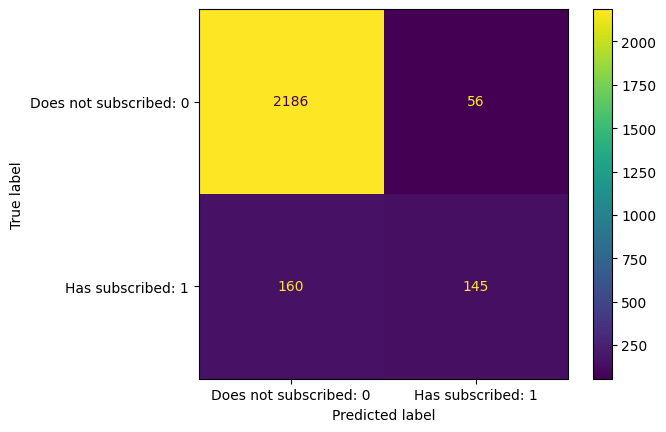

In [ ]:
rf_model = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', min_samples_split = 4, n_estimators = 150)

rf_model.fit(X_train, y_train)
# We calculate the predicted values of y putting in input the X_test
y_pred = rf_model.predict(X_test)

# Now we plot a confusion matrix in order to see how our model performs on the testing dataset:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Does not subscribed: 0", "Has subscribed: 1"])

# We calculate also the evaluation metric Macro F1-Score in order to evaluate this model:
print('F1-macro model: ', f1_score(y_test, y_pred, average='macro'))